# Práctica Final: Despligue de Algoritmos

## 1. Clasificación con Scikit-learn y MLflow

#### 1.1 Exploración y análisis del conjunto de datos

In [1]:
# Instalar librerias
! pip install mlflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━

In [2]:
import pandas as pd
import numpy as np
import mlflow
import mlflow.sklearn

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report

from sklearn.datasets import load_breast_cancer

In [3]:
# Carga del dataset

cancer = load_breast_cancer()
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
df['target'] = cancer['target']

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

#### 1.2 Entrenamiento del modelo utilizando algoritmos de clasificación de Scikit-learn

In [ ]:
# División del dataset
train, test = train_test_split(df, test_size=0.25, shuffle=True, random_state=42) # entrenamiento(75%) / prueba(25%)

In [ ]:
# Preparación y salvar el set de prueba (test)
test_target = test['target']
test[['target']].to_csv('test-target.csv', index=False)
del test['target']
test.to_csv('test.csv', index=False)

In [ ]:
features = [x for x in list(train.columns) if x != 'target']
x_raw = train[features]
y_raw = train['target']

In [ ]:
# División de entrenamiento en subconjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x_raw, y_raw,
                                                    train_size=0.75,
                                                    test_size=.25,
                                                    random_state=42,
                                                    stratify=y_raw)

In [12]:
X_train.iloc[:5]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
272,21.75,20.99,147.30,1491.0,0.09401,0.19610,0.21950,0.10880,0.1721,0.06194,...,28.19,28.18,195.90,2384.0,0.12720,0.4725,0.5807,0.18410,0.2833,0.08858
170,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,...,13.50,15.64,86.97,549.1,0.13850,0.1266,0.1242,0.09391,0.2827,0.06771
80,11.45,20.97,73.81,401.5,0.11020,0.09362,0.04591,0.02233,0.1842,0.07005,...,13.11,32.16,84.53,525.1,0.15570,0.1676,0.1755,0.06127,0.2762,0.08851
402,12.96,18.29,84.18,525.2,0.07351,0.07899,0.04057,0.01883,0.1874,0.05899,...,14.13,24.61,96.31,621.9,0.09329,0.2318,0.1604,0.06608,0.3207,0.07247
450,11.87,21.54,76.83,432.0,0.06613,0.10640,0.08777,0.02386,0.1349,0.06612,...,12.79,28.18,83.51,507.2,0.09457,0.3399,0.3218,0.08750,0.2305,0.09952


In [13]:
y_train.iloc[:5]

272    0
170    1
80     1
402    1
450    1
Name: target, dtype: int64

In [56]:
# Configurar el modelo de clasificación utilizando el algoritmo de XGBoost

clf = XGBClassifier(
    n_estimators=30,
    max_depth=2,
    max_leaves=3,
    learning_rate=1.0,
    random_state=123
)

In [57]:
# Definir Preprocesamiento (Pipeline) y entrenamiento del modelo

preprocessor = Pipeline(steps=[('scaler', StandardScaler())])

model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('XGBClassifier', clf)])
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', StandardScaler())])),
                ('XGBClassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=1.0,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=2, max_leaves=3, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=30,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=123, ...))])

In [58]:
model.get_params()

{'memory': None,
 'steps': [('preprocessor', Pipeline(steps=[('scaler', StandardScaler())])),
  ('XGBClassifier',
   XGBClassifier(base_score=None, booster=None, callbacks=None,
                 colsample_bylevel=None, colsample_bynode=None,
                 colsample_bytree=None, device=None, early_stopping_rounds=None,
                 enable_categorical=False, eval_metric=None, feature_types=None,
                 gamma=None, grow_policy=None, importance_type=None,
                 interaction_constraints=None, learning_rate=1.0, max_bin=None,
                 max_cat_threshold=None, max_cat_to_onehot=None,
                 max_delta_step=None, max_depth=2, max_leaves=3,
                 min_child_weight=None, missing=nan, monotone_constraints=None,
                 multi_strategy=None, n_estimators=30, n_jobs=None,
                 num_parallel_tree=None, random_state=123, ...))],
 'verbose': False,
 'preprocessor': Pipeline(steps=[('scaler', StandardScaler())]),
 'XGBClassifier': 

#### 1.3 Evaluación del modelo utilizando las métricas de rendimiento de accuracy /recall

Evaluemos las métricas en el set de Test

In [59]:
accuracy_test = model.score(X_test, y_test)
test_predict = model.predict(X_test)
recall_test = recall_score(y_test, test_predict, average='binary')
print ('accuracy score:{}'.format(accuracy_test))
print ('recall score:{}'.format(recall_test))

accuracy score:0.9345794392523364
recall score:0.9696969696969697


#### 1.4 Registro de métricas: Utilizando MLflow para registrar métricas y hiperparámetros durante el entrenamiento

In [35]:
!pip install pyngrok
from pyngrok import ngrok
from mlflow.tracking import MlflowClient

In [61]:
ngrok.kill()

In [62]:
# Registro de experimentos con diferentes estimatores 2, 5, 10, 20

mlflow.set_experiment('Cancer Classifier con Accuracy/Recall')
with mlflow.start_run(run_name='Despliegue de Algoritmos'):
  mlflow.log_param('n_estimators', 30)
  mlflow.log_metric('accuracy test', accuracy_test)
  mlflow.log_metric('recall test', recall_test)

get_ipython().system_raw('mlflow ui --port 5000 &')

NGROK_AUTH_TOKEN = '2jFTfNTZSjfF76aLOgk0K8Ip63m_KZmJHbhctRqAqhztgndr'
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

ngrok_tunnel = ngrok.connect(addr='5000', proto='http', bind_tls=True)
print('El tracking UI:', ngrok_tunnel.public_url)

El tracking UI: https://db20-35-234-37-199.ngrok-free.app


- Experimentos: Cancer Classifier con Accuracy/Recall

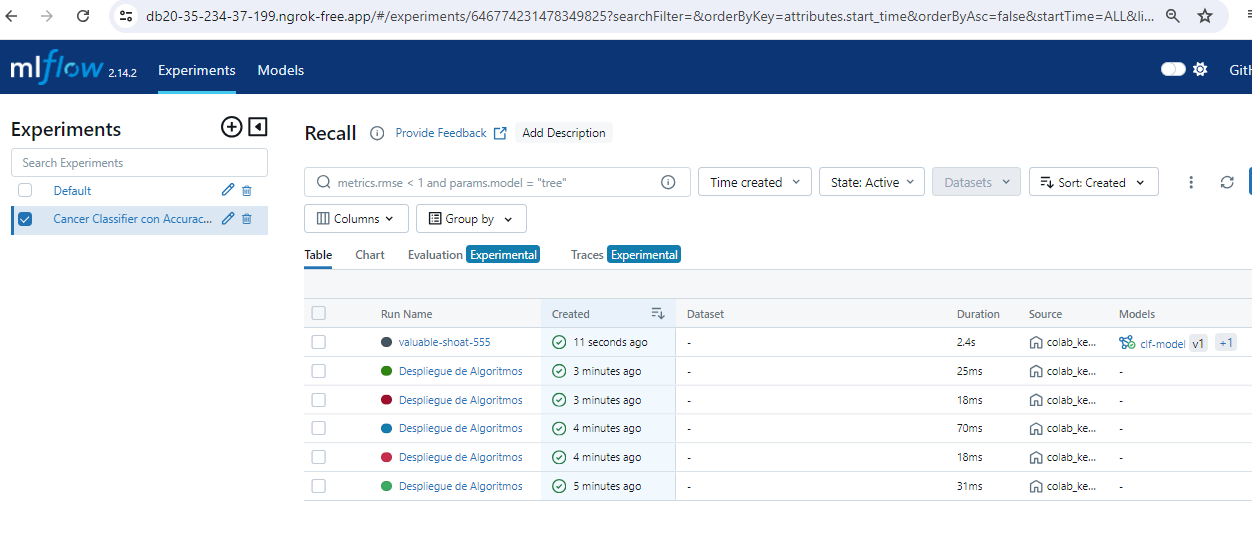

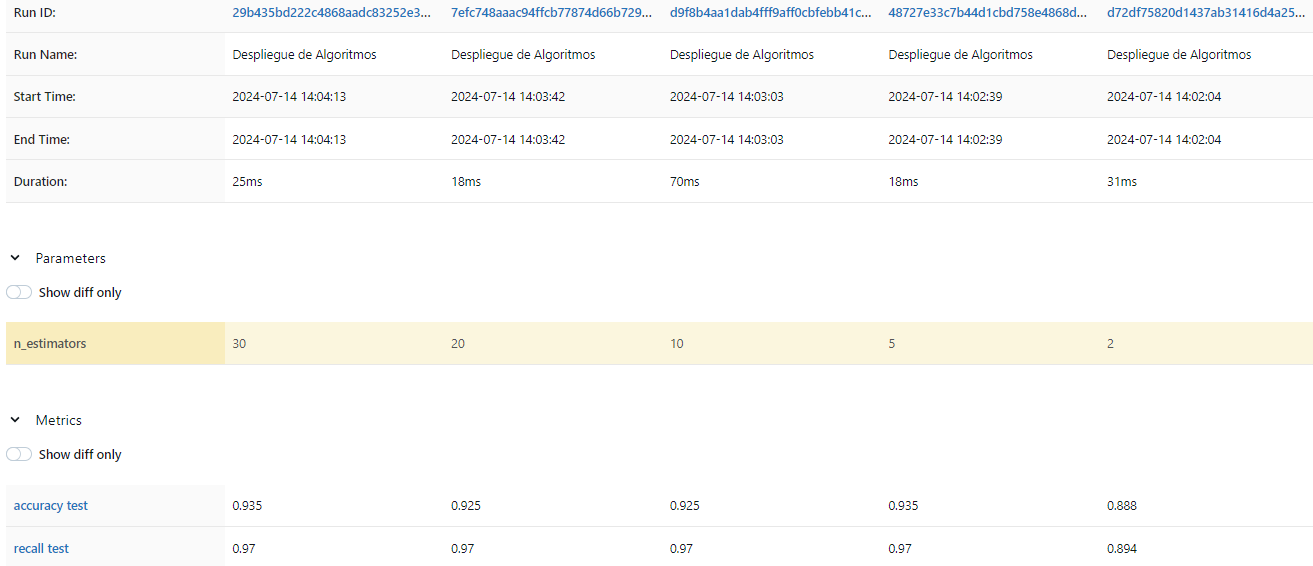

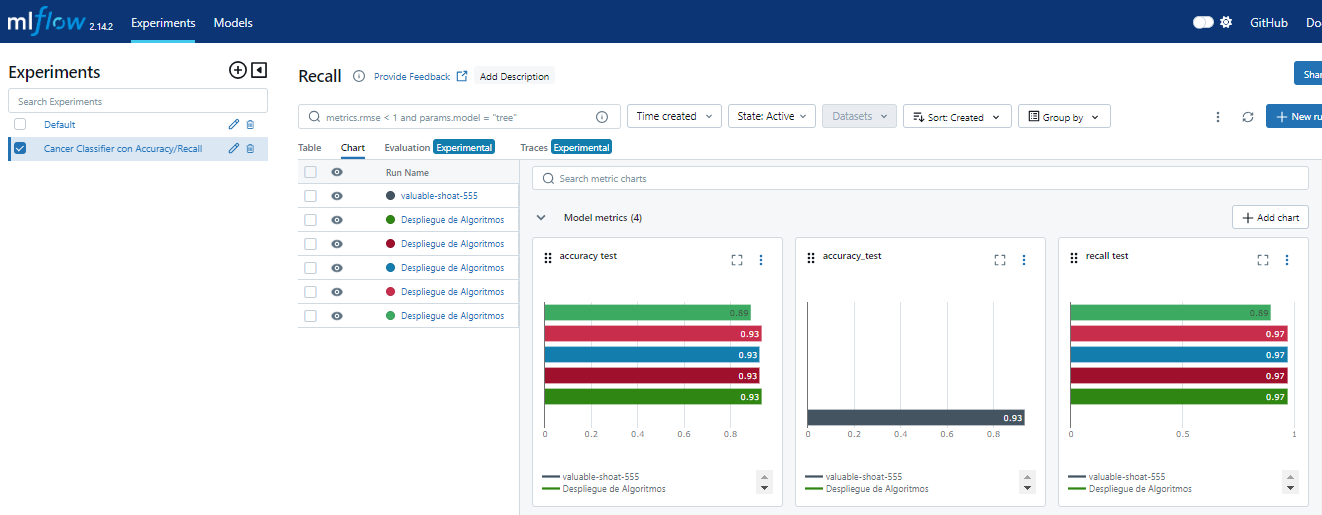

In [63]:
# Registro del modelo .pkl
client = MlflowClient()

In [64]:
model_name = 'clf-model'

In [65]:
with mlflow.start_run() as run:
  run_num = run.info.run_id
  model_uri = 'runs:/{run_id}/artifact_path'.format(run_id=run_num, artifact_path=model_name)

  mlflow.log_metric('accuracy_test', accuracy_test)
  mlflow.log_metric('recall_test', recall_test)
  mlflow.sklearn.log_model(model,model_name)

  model_details = mlflow.register_model(
      model_uri=model_uri,
      name=model_name
  )

Successfully registered model 'clf-model'.
Created version '1' of model 'clf-model'.


- Registro de modelo.pkl

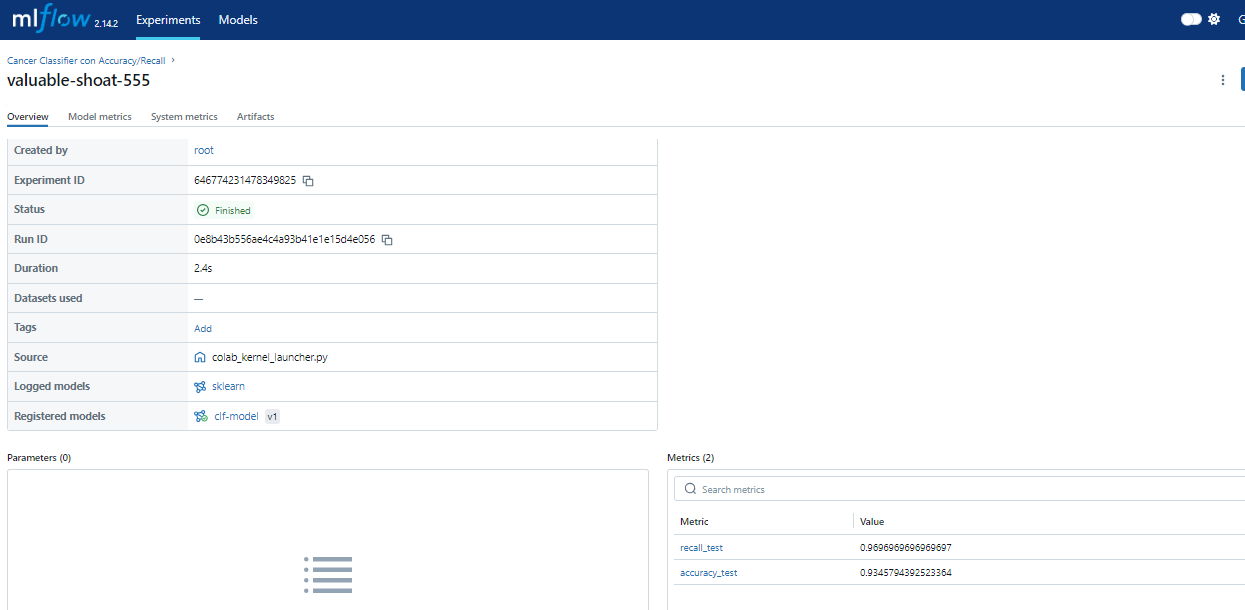

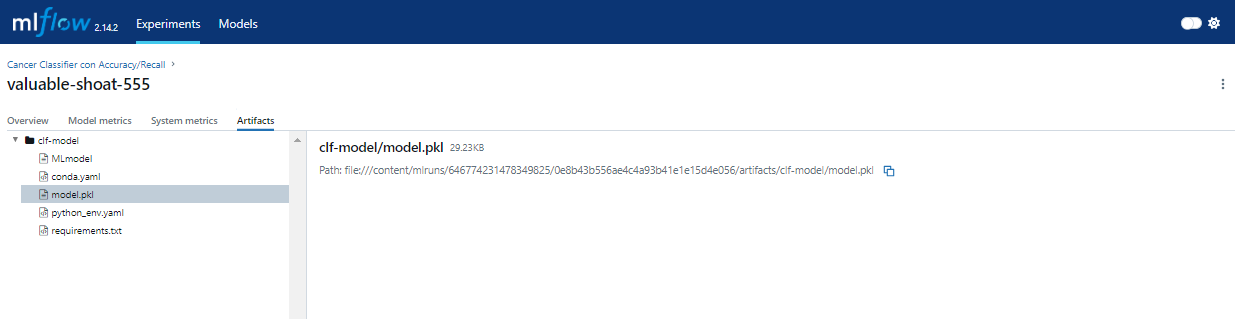

Generamos un script con todos los pasos de MLFlow anteriores para entrenar automaticamente nuestro modelo con variación en el parámetro n_estimators

In [66]:
import pandas as pd
import numpy as np
import mlflow
import time
import mlflow.sklearn
import subprocess
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
df['target'] = cancer['target']

train, test = train_test_split(df, test_size=0.25, shuffle=True, random_state=52)
test_target = test['target']
test[['target']].to_csv('test-target.csv', index=False)
del test['target']
test.to_csv('test.csv', index=False)

features = [x for x in list(train.columns) if x != 'target']
x_raw = train[features]
y_raw = train['target']
X_train, X_test, y_train, y_test = train_test_split(x_raw, y_raw,
                                                    test_size=.25,
                                                    random_state=52,
                                                    stratify=y_raw)

n_stimators = [2,5,10,20,30] # Prueba con diferentes n_estimators

mlflow_ui_process = subprocess.Popen(['mlflow', 'ui', '--port', '5000'])

mlflow.set_experiment('Pruebas Despliegue')
for i in n_stimators:
  with mlflow.start_run() as run:
    clf = XGBClassifier(n_estimators=i,
                      max_depth=2,
                      max_leaves=3,
                      learning_rate=1.0,
                      random_state=42
                      )

    preprocessor = Pipeline(steps=[('scaler', StandardScaler())])

    model = Pipeline(steps=[('preprocessor', preprocessor),
                              ('XGBClassifier', clf)])
    model.fit(X_train, y_train)
    accuracy_test = model.score(X_test, y_test)
    test_predict = model.predict(X_test)
    recall_test = recall_score(y_test, test_predict, average='binary')

    mlflow.log_metric('accuracy_test', accuracy_test)
    mlflow.log_metric('recall_test', recall_test)
    mlflow.log_param('n_stimators', i)
    mlflow.sklearn.log_model(model, 'clf-model')

2024/07/14 19:16:25 INFO mlflow.tracking.fluent: Experiment with name 'Pruebas Despliegue' does not exist. Creating a new experiment.


- Pruebas Despligue: Resultados de métricas con script automatizado y variación de parametro n_estimadores

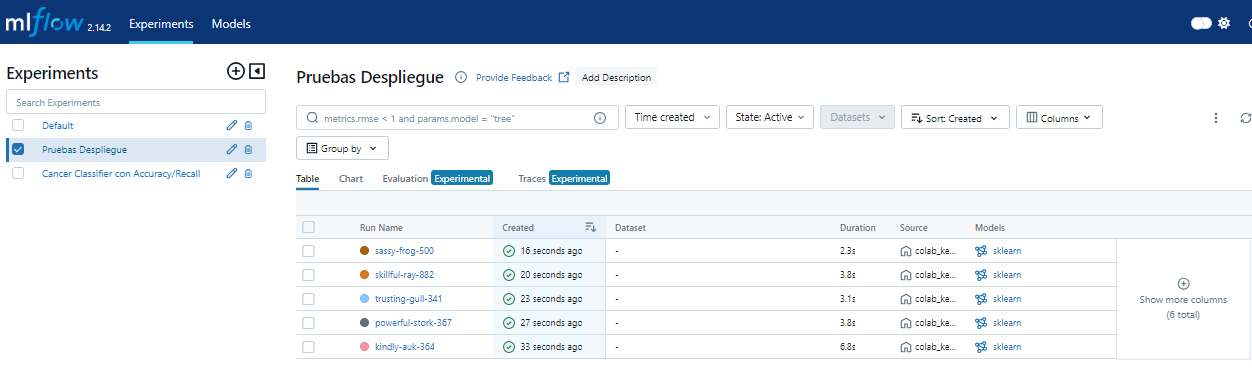

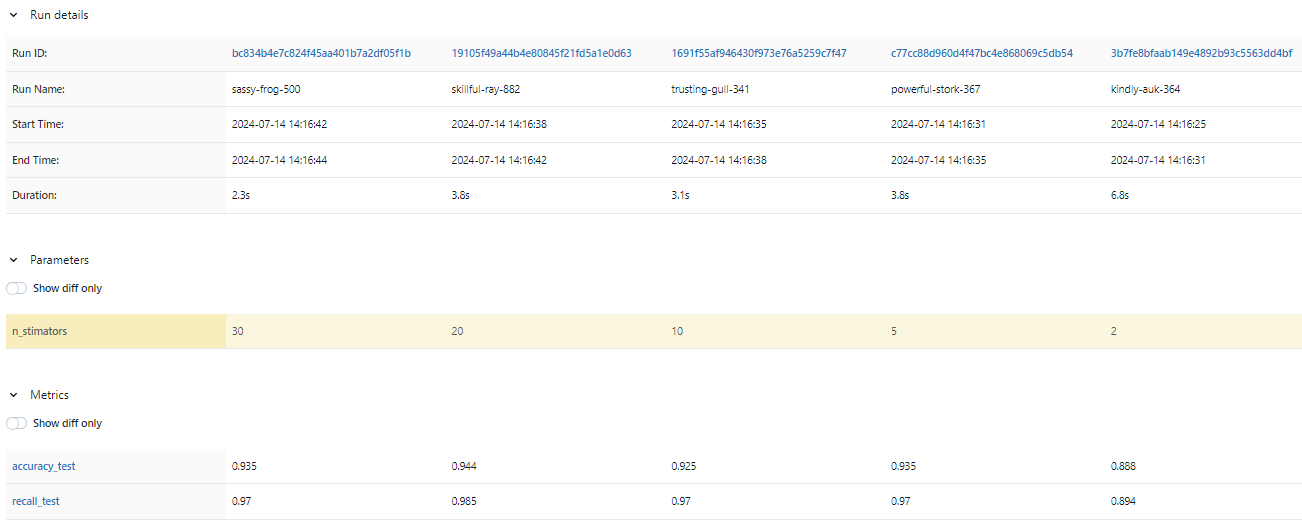

## 2. Generar .py de funciones y main

#### 2.1 Crear fichero . py con las funciones pasando 2 argumentos de entrada (n-estimators, maxdepth)

In [67]:
%%writefile funciones.py
import pandas as pd
import numpy as np
import mlflow
import time
import mlflow.sklearn
import subprocess
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import argparse

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report

from sklearn.datasets import load_breast_cancer

def argumentos():
    print("aaa")
    parser = argparse.ArgumentParser(description='__main__ de la aplicación con argumentos de entrada.')
    parser.add_argument('--nombre_job', type=str, help='Valor para el parámetro nombre_documento.')
    parser.add_argument('--n_estimators_list', nargs='+', type=int, help='List of n_estimators values.')
    parser.add_argument('--maxdepth_list', nargs='+', type=int, help='List of maxdepth values.')
    return parser.parse_args()

def load_dataset():
    cancer = load_breast_cancer()
    df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
    df['target'] = cancer['target']
    return df

def data_treatment(df):
    train, test = train_test_split(df, test_size=0.25, shuffle=True, random_state=62)
    test_target = test['target']
    test[['target']].to_csv('test-target.csv', index=False)
    del test['target']
    test.to_csv('test.csv', index=False)

    features = [x for x in list(train.columns) if x != 'target']
    x_raw = train[features]
    y_raw = train['target']
    X_train, X_test, y_train, y_test = train_test_split(x_raw, y_raw,
                                                        test_size=.25,
                                                        random_state=62,
                                                        stratify=y_raw)
    return X_train, X_test, y_train, y_test

def mlflow_tracking(nombre_job, X_train, X_test, y_train, y_test, n_estimators, maxdepth):
    mlflow_ui_process = subprocess.Popen(['mlflow', 'ui', '--port', '5000'])
    print(mlflow_ui_process)
    time.sleep(5)
    mlflow.set_experiment(nombre_job)
    for i in n_estimators:
      for m in maxdepth:
        with mlflow.start_run() as run:
            clf = XGBClassifier(n_estimators=i,
                                max_depth=m,
                                max_leaves=3,
                                learning_rate=1.0,
                                random_state=42
                            )

            preprocessor = Pipeline(steps=[('scaler', StandardScaler())])

            model = Pipeline(steps=[('preprocessor', preprocessor),
                                    ('XGBClassifier', clf)])

            model.fit(X_train, y_train)
            accuracy_test = model.score(X_test, y_test)
            test_predict = model.predict(X_test)
            recall_test = recall_score(y_test, test_predict, average='binary')

            mlflow.log_metric('accuracy test', accuracy_test)
            mlflow.log_metric('recall test', recall_test)
            mlflow.log_param('n_estimators', i)
            mlflow.log_param('n_maxdepth', m)
            mlflow.sklearn.log_model(model, 'clf-model')
    print("Se ha acabado el entrenamiento del modelo correctamente")

Writing funciones.py


#### 2.2 Crear main. py como orquestador de las funciones.py

In [68]:
# main.py
%%writefile main.py
from funciones import argumentos, load_dataset, data_treatment, mlflow_tracking

def main():
  print("Eejcutamos el main")
  args_values = argumentos()
  df = load_dataset()
  x_train, x_test, y_train, y_test = data_treatment(df)
  mlflow_tracking(args_values.nombre_job, x_train, x_test, y_train, y_test, args_values.n_estimators_list, args_values.maxdepth_list)

if __name__ == "__main__":
  main()

Writing main.py


In [69]:
!python3 main.py \
--nombre_job "PruebasDesdeFuncioness" \
--n_estimators_list 2 5 10 20 30 \
--maxdepth_list 2 3 4 5

Eejcutamos el main
aaa
<Popen: returncode: None args: ['mlflow', 'ui', '--port', '5000']>
[2024-07-14 19:20:06 +0000] [13115] [INFO] Starting gunicorn 22.0.0
[2024-07-14 19:20:06 +0000] [13115] [ERROR] Connection in use: ('127.0.0.1', 5000)
[2024-07-14 19:20:06 +0000] [13115] [ERROR] Retrying in 1 second.
[2024-07-14 19:20:07 +0000] [13115] [ERROR] Connection in use: ('127.0.0.1', 5000)
[2024-07-14 19:20:07 +0000] [13115] [ERROR] Retrying in 1 second.
2024/07/14 19:20:08 INFO mlflow.tracking.fluent: Experiment with name 'PruebasDesdeFuncioness' does not exist. Creating a new experiment.
[2024-07-14 19:20:08 +0000] [13115] [ERROR] Connection in use: ('127.0.0.1', 5000)
[2024-07-14 19:20:08 +0000] [13115] [ERROR] Retrying in 1 second.
[2024-07-14 19:20:09 +0000] [13115] [ERROR] Connection in use: ('127.0.0.1', 5000)
[2024-07-14 19:20:09 +0000] [13115] [ERROR] Retrying in 1 second.
[2024-07-14 19:20:10 +0000] [13115] [ERROR] Connection in use: ('127.0.0.1', 5000)
[2024-07-14 19:20:10 +000

- Ejecución de Main.py: Pruebas de funciones

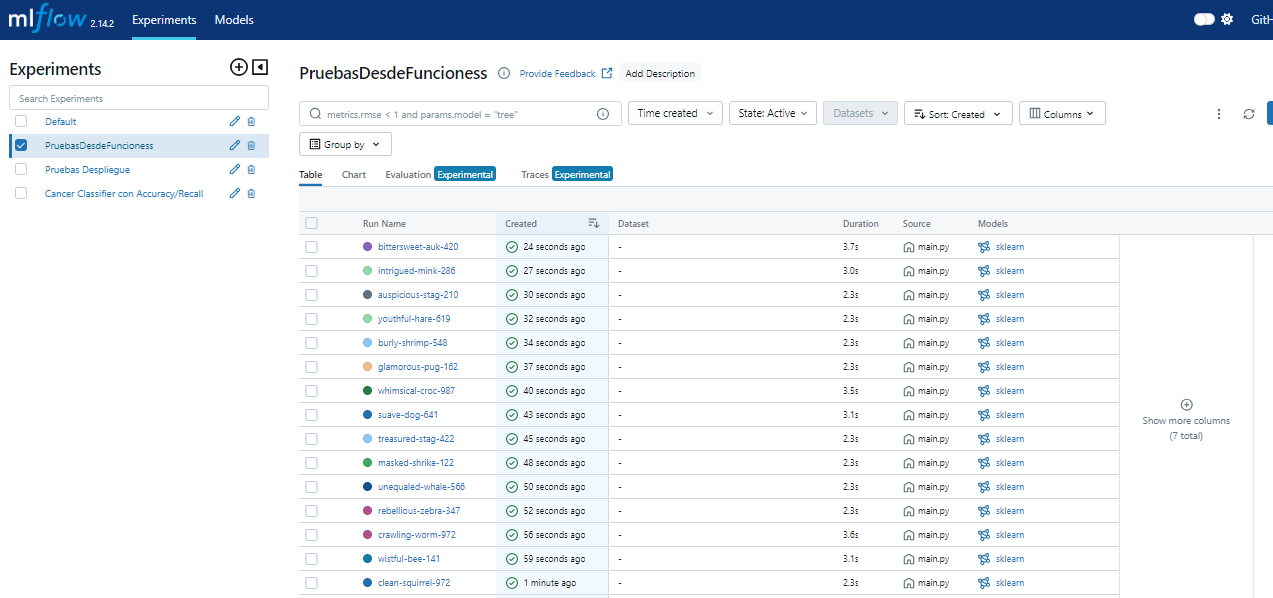

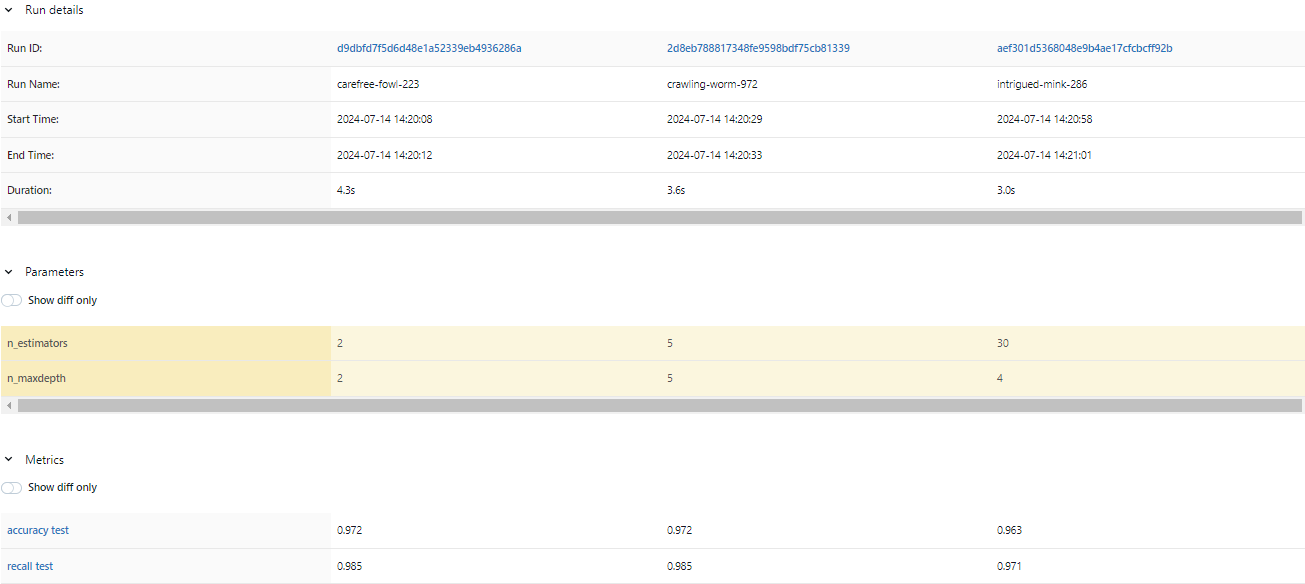

## 3. FastAPI

Instalar FastAPI

In [ ]:
!pip install fastapi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.4/341.4 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
ngrok.kill()

In [ ]:
# Establecer un tunel de conexión con token de Ngrok

import nest_asyncio
from pyngrok import ngrok, conf
NGROK_TOKEN = '2jCzMzveRP8YD8G6sOTp5OUg4Zm_66RcjCsyt2NW1uoBbB9d5'
conf.get_default().auth_token = NGROK_TOKEN

ngrok_tunell = ngrok.connect(8000)
print('Este es el URL,',ngrok_tunell.public_url)
nest_asyncio.apply()

Este es el URL, https://edac-34-125-230-107.ngrok-free.app


#### 3.1 Generación de script con 5 modulos app.get

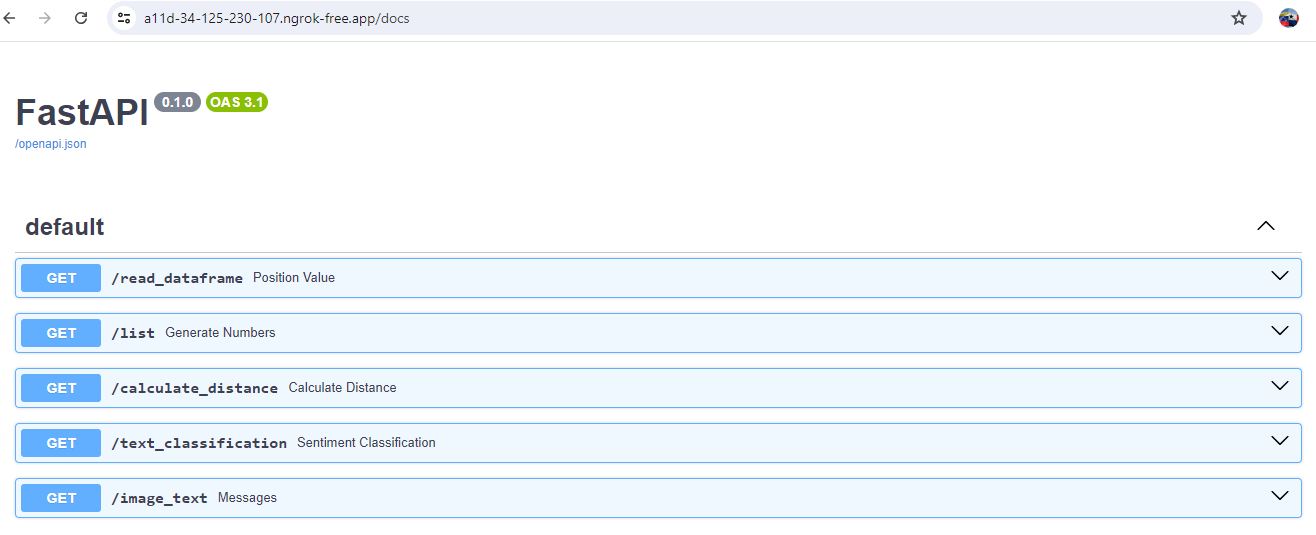

In [ ]:
%%writefile main2.py
from typing import Optional
from fastapi import FastAPI
import pandas as pd
from typing import Dict
from transformers import pipeline

app = FastAPI()

# Primer módulo: lee el valor de una posición (entrada) en un dataframe
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

@app.get('/read_dataframe')
def position_value(position: int):
  value = df['petal_width'][position]
  return {'Value': value}

# Segundo módulo: genera una lista de numeros consecutivos a partir de un numero inicial (seed) y una longuitud (length)
@app.get('/list')
def generate_numbers(seed: int, length: int):
    numbers = [seed + i for i in range(length)]
    return {'numbers': numbers}

# Tercer módulo: Calcula la distancia euclidiana entre dos puntos A y B (x-y: coordenadas de entrada )
@app.get('/calculate_distance')
def calculate_distance(ax: float, ay: float, bx: float, by: float) -> Dict[str, float]:
    distance = ((bx - ax) ** 2 + (by - ay) ** 2) ** 0.5
    return {'distance': distance}

# Cuarto módulo: Analisis de sentimiento de acuerdo a un texto de entrada
@app.get('/sentiment_analysis')
def sentiment_classification(prompt):
  sentiment_pipeline = pipeline("text-classification", model="siebert/sentiment-roberta-large-english")
  return {'sentiment': sentiment_pipeline(prompt)[0]['label']}

# Quinto módulo:
@app.get('/image_text')
def messages(prompt):
  image_to_text = pipeline("image-to-text", model="nlpconnect/vit-gpt2-image-captioning")
  return {'generated_text': image_to_text(prompt)}


Overwriting main2.py


#### 3.2 Captura de cada una de los modulos con la respuesta dentro de docs

Primer módulo: Lectura de un Dataframe

- Recibe una posición y devuelve su valor dentro de un dataframe

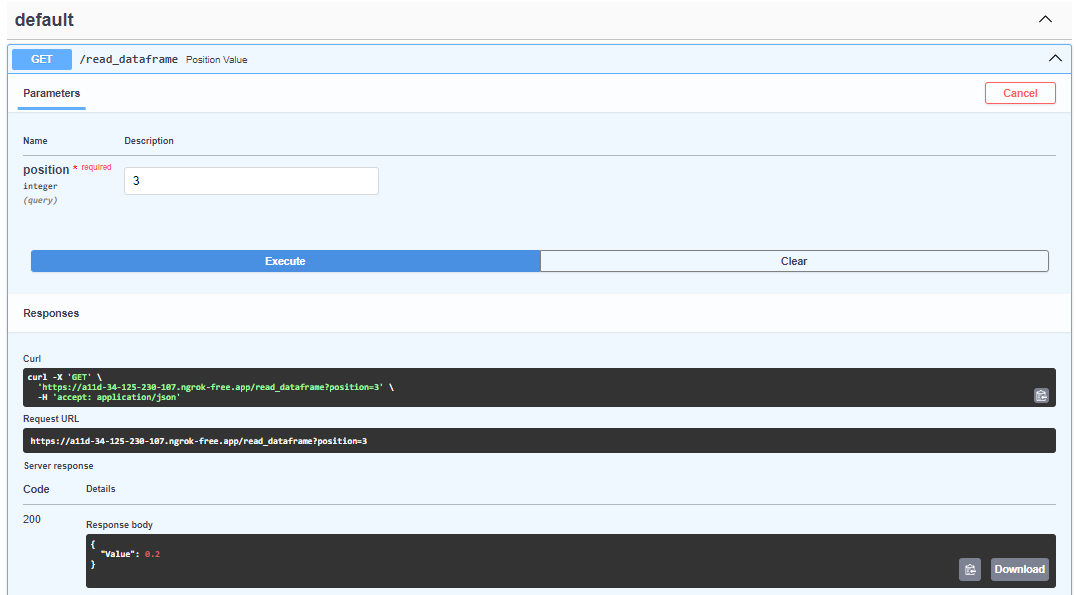

Segundo módulo: Genera un lista de números

- Recibe número inicial y longuitud, devuelve una lista de números consecutivos

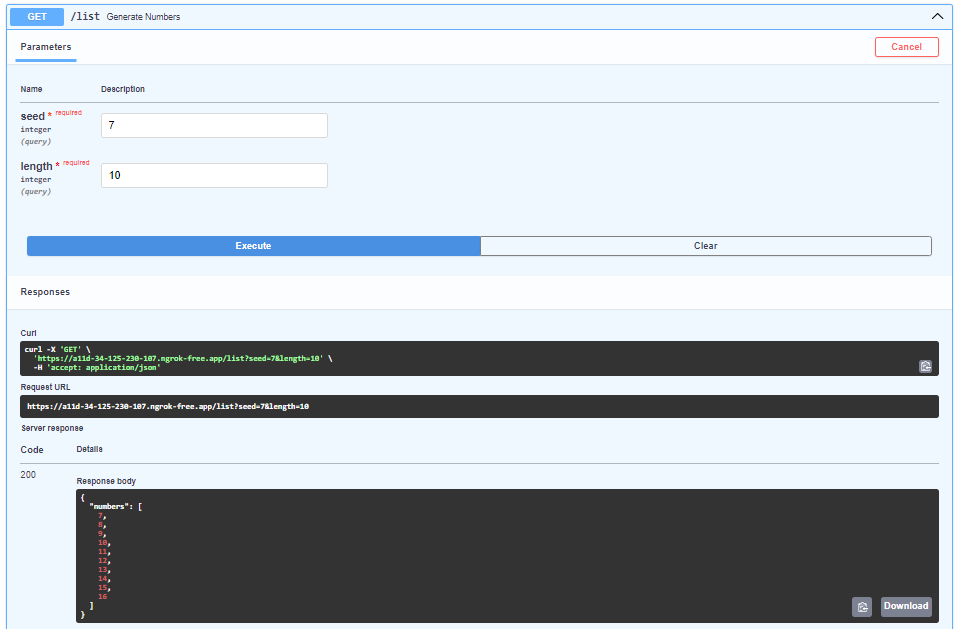

Tercer módulo: Calcula la distancia entre dos puntos

- Recibe las coordenadas (x,y) de dos puntos A y B, calcula la distancia euclidiana entre ellos

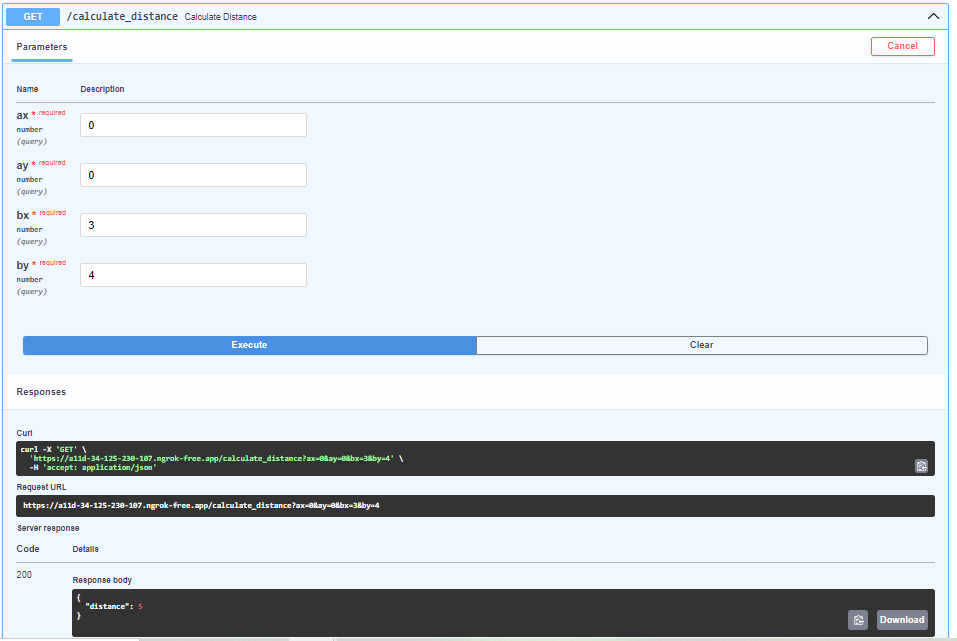

Cuarto módulo: Análisis de Sentimiento

- Recibe el texto con la opinión del cliente y clasifica si es posivita o negativa

Quinto módulo: Texto sobre la imagen

- Recibe una imagen en formato .png: https://raw.githubusercontent.com/mdosreis69/Practicas_BootCamp/main/Avatar.png y genera un texto relacionado

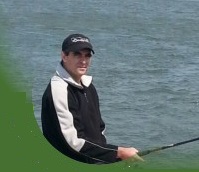

In [ ]:
# Prueba externa
image_to_text = pipeline("image-to-text", model="nlpconnect/vit-gpt2-image-captioning")

image_to_text("https://raw.githubusercontent.com/mdosreis69/Practicas_BootCamp/main/Avatar.png")

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1168: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


[{'generated_text': 'a man is standing on a board in the water '}]

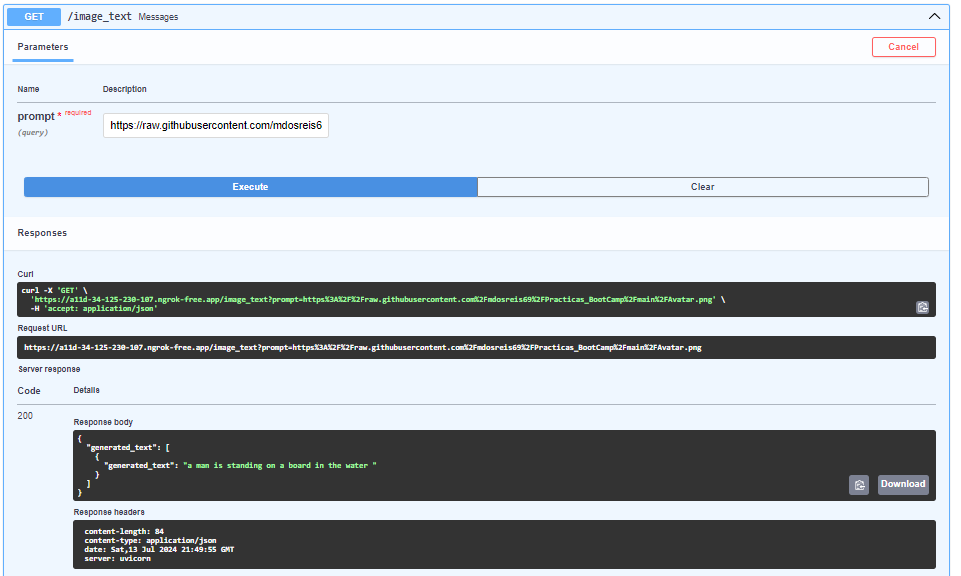

#### 3.3 Mensajeria  y captura de llamadas https de cada uno de los modulos

In [ ]:
# Correr las aplicaciones de FastAPI en un servidor remoto (Uvicorn)
! uvicorn main2:app --port 8000

2024-07-13 23:24:29.173674: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-13 23:24:29.173759: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-13 23:24:29.181465: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-13 23:24:31.973339: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
INFO:     Started server process [115703]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
INFO:     190.34.8.38:0 - "GET / HTTP/1.1"